In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline


nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1m_00010101_00011231_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1y_00010101_00011231_ptrc_T.nc']


In [2]:
ptrc=nc.Dataset(nc_filename[0])

In [3]:
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]
TR_9=ptrc.variables['TR_9'][:]
TR_8=ptrc.variables['TR_8'][:]
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
#ice=ptrc.variables['ice_cover'][:]
#u=ptrc.variables['uoce'][:]
#v=ptrc.variables['voce'][:]
#w=ptrc.variables['woce'][:]

lonlim=[-180, 180]
latlim=[-78, 89]
print TR_7.shape
print nav_lat.shape

(11, 31, 149, 182)
(149, 182)


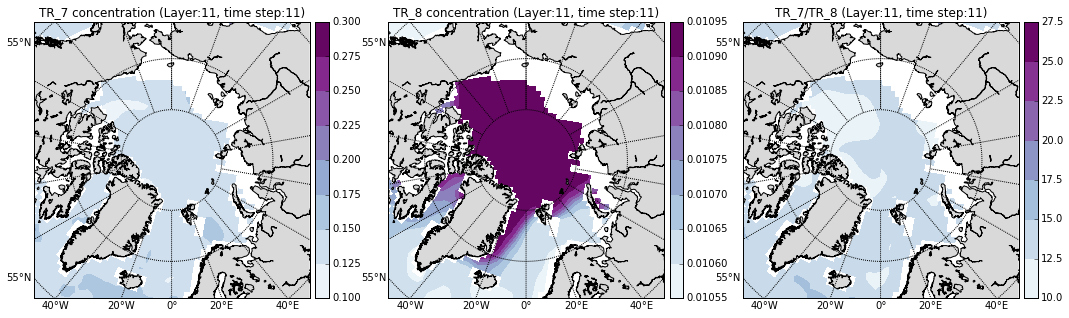

In [5]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7/1e6
data2=TR_8/1e6
i=10
layer=10
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)

cs=m.contourf(x,y,data[i,layer,:,:]/data2[i,layer,:,:],cmap=plt.cm.BuPu)    
plt.title('TR_7/TR_8 (Layer:%s, time step:%s)'%(layer+1,i+1))
cbar = m.colorbar(cs,location='right',pad="2%")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(131)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
#cs=m.contourf(x,y,ice[i,:,:],cmap=plt.cm.bone)
cs=m.contourf(x,y,data[i,layer,:,:],cmap=plt.cm.BuPu)  
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_7 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))
#plt.title("Sea ice concentration")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(132)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
cs=m.contourf(x,y,data2[i,layer,:,:],cmap=plt.cm.BuPu)
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_8 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))
#Q=m.quiver(x, y, u[i,layer,:,:], v[i,layer,:,:],scale=0.8)
  #smaller the number, longer the line
#Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.03, '0.03 m/s', labelpos='N') # width, height, scale, label, position
#ax.set_title('currents (Layer=95m, Time=1)', fontsize=12)

pl.show()

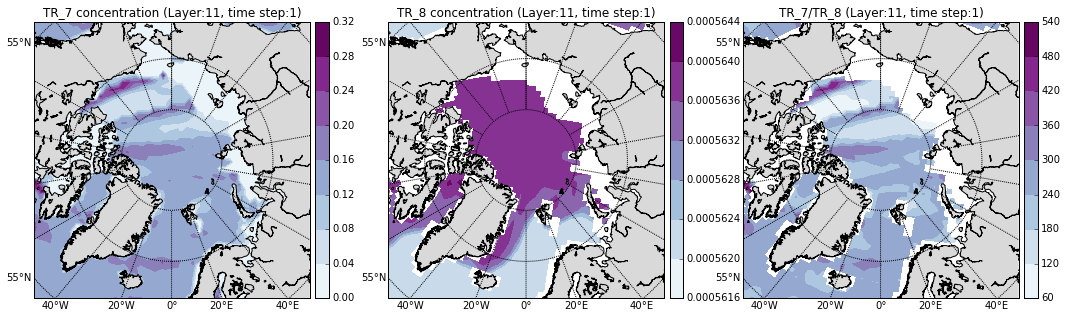

In [6]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7/1e6
data2=TR_8/1e6
i=0
layer=10
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)

cs=m.contourf(x,y,data[i,layer,:,:]/data2[i,layer,:,:],cmap=plt.cm.BuPu)    
plt.title('TR_7/TR_8 (Layer:%s, time step:%s)'%(layer+1,i+1))
cbar = m.colorbar(cs,location='right',pad="2%")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(131)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
#cs=m.contourf(x,y,ice[i,:,:],cmap=plt.cm.bone)
cs=m.contourf(x,y,data[i,layer,:,:],cmap=plt.cm.BuPu)  
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_7 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))
#plt.title("Sea ice concentration")
#pl.show()


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(132)
m = Basemap(projection='npstere',boundinglat=63,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
cs=m.contourf(x,y,data2[i,layer,:,:],cmap=plt.cm.BuPu)
cbar = m.colorbar(cs,location='right',pad="2%")
plt.title('TR_8 concentration (Layer:%s, time step:%s)'%(layer+1,i+1))
#Q=m.quiver(x, y, u[i,layer,:,:], v[i,layer,:,:],scale=0.8)
  #smaller the number, longer the line
#Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.03, '0.03 m/s', labelpos='N') # width, height, scale, label, position
#ax.set_title('currents (Layer=95m, Time=1)', fontsize=12)

pl.show()